In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import itertools

from cartopy.mpl.patch import geos_to_path
import cartopy.crs as crs
import cartopy.feature as cfeature

from matplotlib.collections import LineCollection, PolyCollection
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [4]:
#replaced with bottom temperature for testing 

HYCOM = xr.open_dataset(r'C:\Users\David\CRI_Modeling\Data\2015.nc4')
#HYCOM_bottom = xr.open_dataset(r'C:\Users\David\CRI_Modeling\Data\2015_bottom_temp.nc4')

In [5]:
HYCOM

<xarray.Dataset>
Dimensions:            (depth: 40, lat: 376, lon: 201, time: 1)
Coordinates:
  * time               (time) datetime64[ns] 2015-12-31T09:00:00
  * lat                (lat) float64 20.0 20.08 20.16 20.24 ... 44.92 44.96 45.0
  * lon                (lon) float64 -126.0 -125.9 -125.8 ... -110.1 -110.0
  * depth              (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
Data variables:
    water_temp_bottom  (time, lat, lon) float32 ...
    water_temp         (time, depth, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        20.0
    geospatial_lat_max:        45.0
    geospatial_lon_min:        -126.0
    geospatial_lon_max:        -110.0

In [6]:
HYCOM.water_temp

<xarray.DataArray 'water_temp' (time: 1, depth: 40, lat: 376, lon: 201)>
[3023040 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-12-31T09:00:00
  * lat      (lat) float64 20.0 20.08 20.16 20.24 ... 44.88 44.92 44.96 45.0
  * lon      (lon) float64 -126.0 -125.9 -125.8 -125.8 ... -110.2 -110.1 -110.0
  * depth    (depth) float64 0.0 2.0 4.0 6.0 8.0 ... 2.5e+03 3e+03 4e+03 5e+03
Attributes:
    long_name:      Water Temperature
    standard_name:  sea_water_temperature
    units:          degC
    NAVO_code:      15
    comment:        in-situ temperature

In [7]:
lat = HYCOM.lat.data
lon = HYCOM.lon.data
depth = HYCOM.depth.data

In [8]:
# Put in your temperature ranges here:
# All temperatures in Celcius
min_Temp = 15
max_Temp = 24
max_variance = 0.5

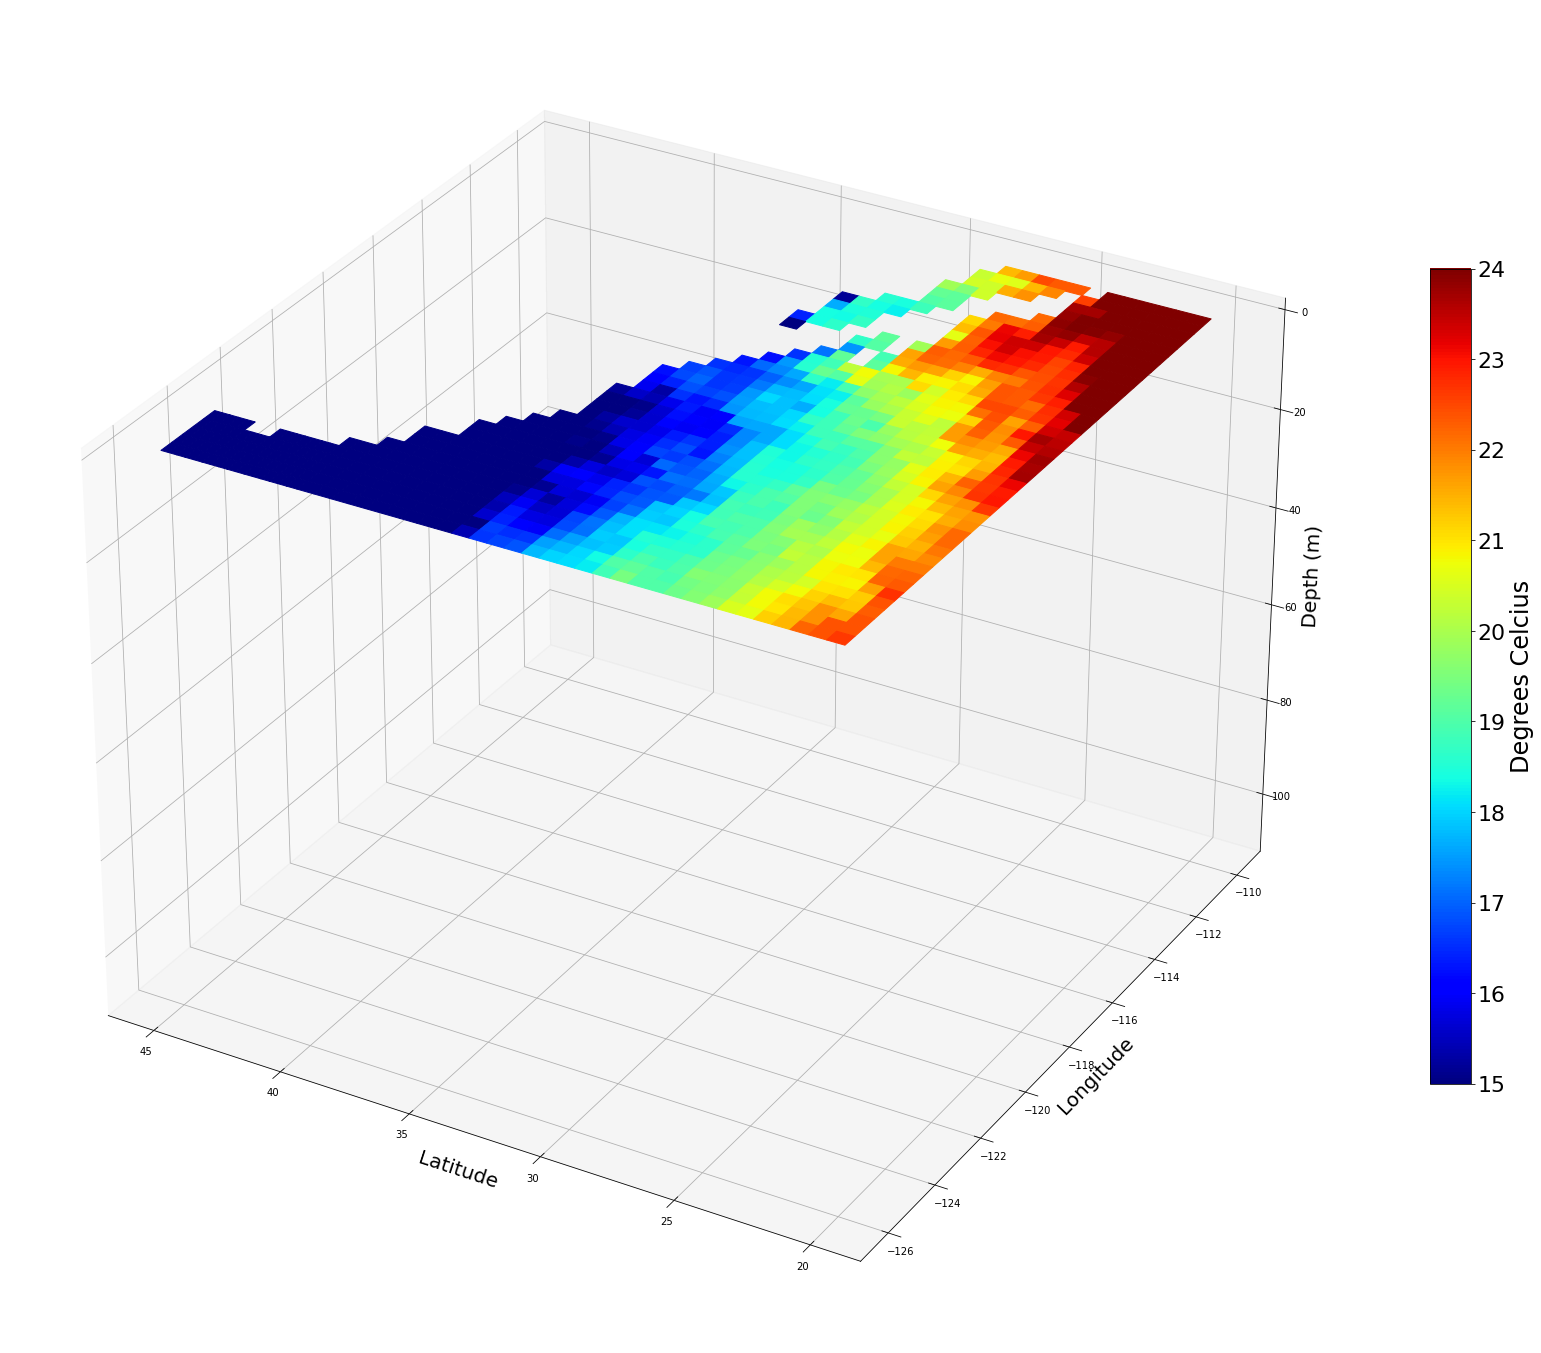

In [35]:
# Creating temperature maps
# Just for getting state lines 
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

temp_slice = HYCOM.water_temp[0]
#water_surface = HYCOM.surf_el[0]

fig = plt.figure(figsize=[30,30])

#NOAA_Plot = fig.add_subplot(1,1,1,projection=crs.LambertConformal())    
Depth_Plot = fig.add_subplot(1,1,1,projection='3d')

#Depth_Plot.set_title("Temperature at Depth: " + str(depth[d]), fontsize=20)

LAT, LON = np.meshgrid(lon, lat)


for d in range(len(depth)-39):
    if depth[d] < 125:
        depths = (LAT*0) + depth[d]
        cmap = plt.cm.jet
        norm = matplotlib.colors.Normalize(vmax=max_Temp, vmin=min_Temp)
        colors = cmap(norm(temp_slice[d]))
        Depth_Colormesh = Depth_Plot.plot_surface(LON, LAT, depths, facecolors=colors, vmax=max_Temp, vmin=min_Temp, cmap='jet')
       

        #Depth_Colormesh = Depth_Plot.plot_surface(LON, LAT, depths, cmap='jet',vmax=max_Temp, vmin=min_Temp)
        #Depth_Colormesh = Depth_Plot.pcolormesh(lon, lat, temp_slice[2], zs=0, zdir="z",cmap='jet',vmax=max_Temp, vmin=min_Temp)
        #Depth_Colormesh = Depth_Plot.contourf(LON, LAT, colors[:,:,0] - 28, cmap='binary', linewidths = 2)  # Plot contour curves


Depth_Plot.set_xlabel('Latitude', fontsize=20)
Depth_Plot.set_ylabel('Longitude', fontsize=20)
Depth_Plot.set_zlabel('Depth (m)', fontsize=20)
Depth_Plot.set_zlim(110, 0)
Depth_Plot.invert_xaxis()
#Depth_Plot.invert_yaxis()
# Depth_Plot.invert_zaxis()

#Depth_Plot.add_feature(cfeature.COASTLINE)
# Depth_Plot.add_feature(cfeature.LAND)
# Depth_Plot.add_feature(cfeature.BORDERS)
# Depth_Plot.add_feature(states_provinces, edgecolor='gray')
# Depth_Plot.gridlines()

    # Create a colorbar
cb = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
cb.set_array([])
colorbar = fig.colorbar(cb, shrink=0.5)
colorbar.set_label('Degrees Celcius',fontsize=24)
colorbar.ax.tick_params(labelsize=22)
# fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Interannual Variability GIFs\Temperature\ " + str(curYear)+ ".png", bbox_inches='tight')

In [24]:
# # Creating temperature maps
# # Just for getting state lines 
# states_provinces = cfeature.NaturalEarthFeature(
#         category='cultural',
#         name='admin_1_states_provinces_lines',
#         scale='50m',
#         facecolor='none')

# temp_slice = HYCOM.water_temp[0]
# water_surface = HYCOM.surf_el[0]

# # fig = plt.figure(figsize=[20,20])
# # Depth_Plot = fig.add_subplot(1,1,1,projection='3d')

# LAT, LON = np.meshgrid(lon, lat)

# colorbar = fig.colorbar(Depth_Colormesh, shrink=0.7, anchor=('SW'))
# colorbar.set_label('Degrees Celcius',fontsize=24)
# colorbar.ax.tick_params(labelsize=22)

# for d in range(len(depth)):
#     if depth[d] < 125:
#         fig = plt.figure(figsize=[20,20])
#         Depth_Plot = fig.add_subplot(1,1,1,projection='3d')
        
#         Depth_Plot.set_title("Temperature at Depth: " + str(depth[d]), fontsize=20)
        
#         Depth_Plot.set_xlabel('Latitude', fontsize=20)
#         Depth_Plot.set_ylabel('Longitude', fontsize=20)
#         Depth_Plot.set_zlabel('Depth (m)', fontsize=20)
#         Depth_Plot.set_zlim(110, 0)
#         Depth_Plot.invert_xaxis()

#         cb = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
#         cb.set_array([])
#         colorbar = fig.colorbar(cb, shrink=0.5)
#         colorbar.set_label('Degrees Celcius',fontsize=24)
#         colorbar.ax.tick_params(labelsize=22)
        
#         depths = (LAT*0) + depth[d]
#         cmap = plt.cm.jet
#         norm = matplotlib.colors.Normalize(vmax=max_Temp, vmin=min_Temp)
#         colors = cmap(norm(temp_slice[d]))
#         Depth_Colormesh = Depth_Plot.plot_surface(LON, LAT, depths, facecolors=colors, vmax=max_Temp, vmin=min_Temp, cmap='jet')
        
#         fig.savefig(r"C:\Users\David\OneDrive\Desktop\Depth Maps\ " + str(depth[d])+ ".jpg", bbox_inches='tight')


# #Depth_Plot.add_feature(cfeature.COASTLINE)
# # Depth_Plot.add_feature(cfeature.LAND)
# # Depth_Plot.add_feature(cfeature.BORDERS)
# # Depth_Plot.add_feature(states_provinces, edgecolor='gray')
# # Depth_Plot.gridlines()

   

In [25]:
print(str(lat.max()) + " : "  + str(lat.min()) + " : "  + str(lon.max()) + " : "  + str(lon.min()) + " : ")

45.0 : 20.0 : -110.0 : -126.0 : 


In [12]:
HYCOM

<xarray.Dataset>
Dimensions:            (depth: 40, lat: 376, lon: 201, time: 1)
Coordinates:
  * time               (time) datetime64[ns] 2015-12-31T09:00:00
  * lat                (lat) float64 20.0 20.08 20.16 20.24 ... 44.92 44.96 45.0
  * lon                (lon) float64 -126.0 -125.9 -125.8 ... -110.1 -110.0
  * depth              (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
Data variables:
    water_temp_bottom  (time, lat, lon) float32 1.285 1.238 1.283 ... nan nan
    water_temp         (time, depth, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        20.0
    geospatial_lat_max:        45.0
    geospatial_lon_min:        -126.0
    geospatial_lon_max:        -110.0

IndexError: index 5 is out of bounds for axis 0 with size 4

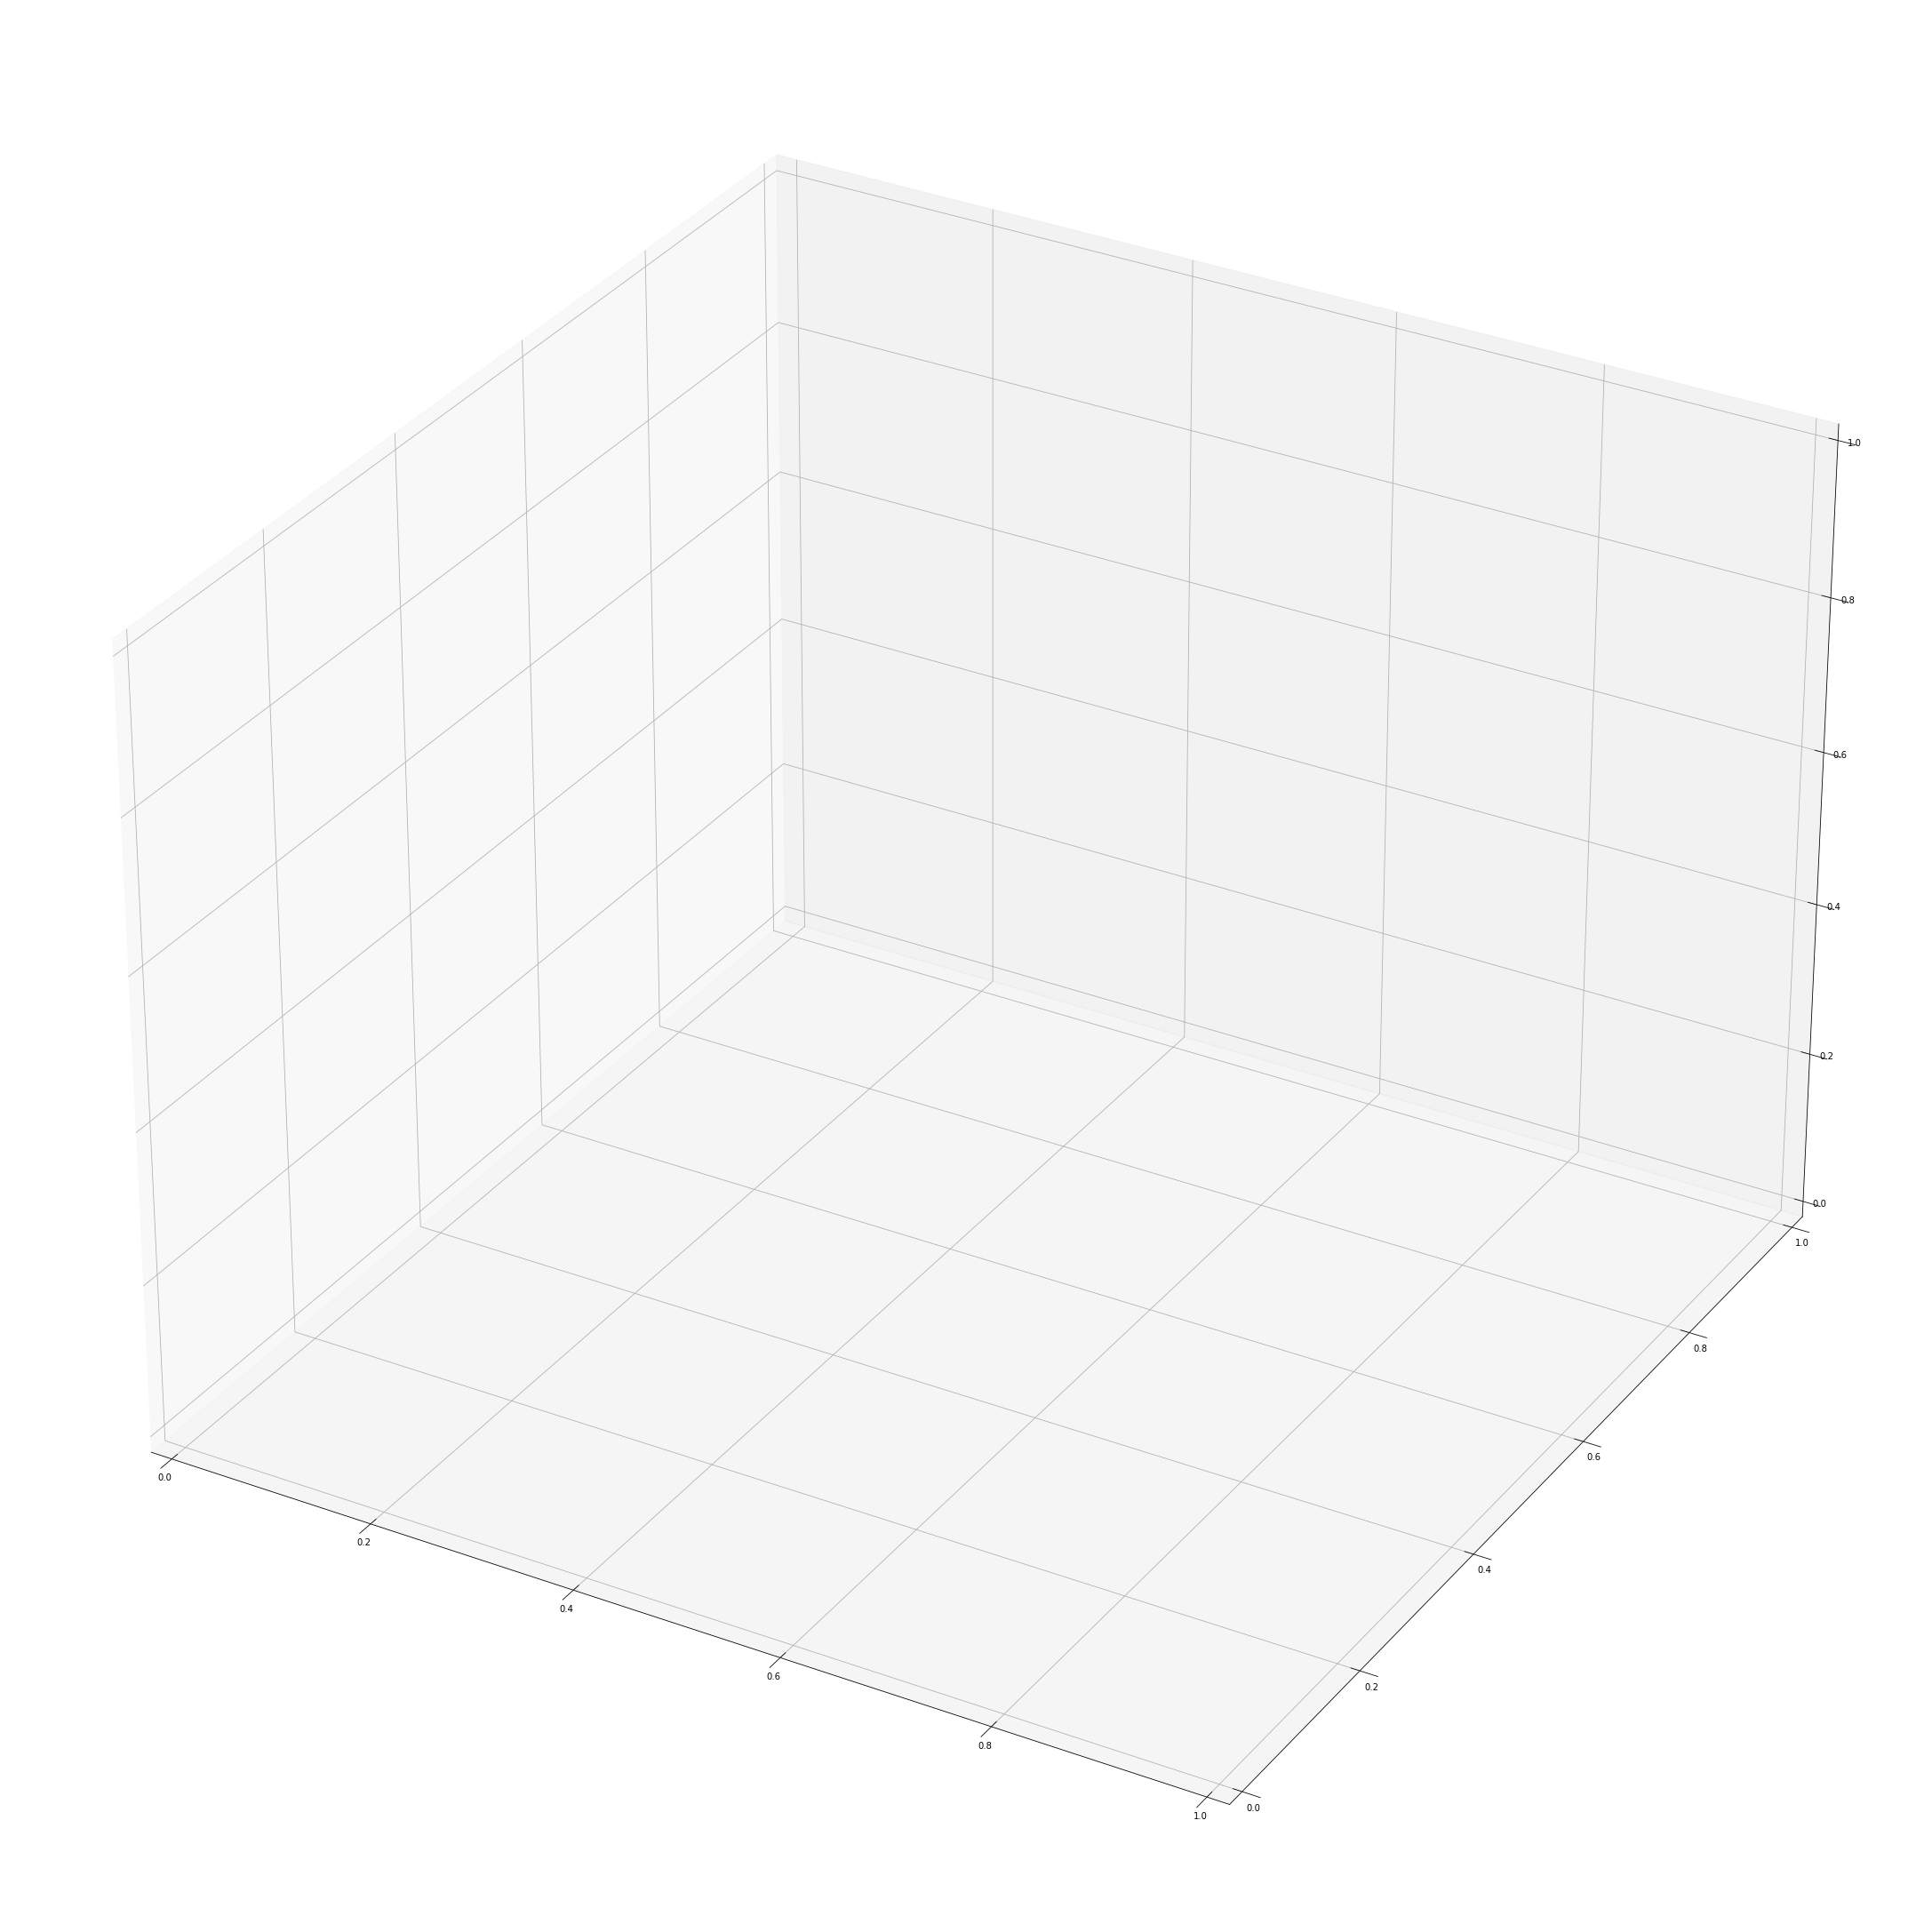

In [9]:
#Testing
# Creating temperature maps
# Just for getting state lines 
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

temp_slice = HYCOM.water_temp_bottom[0]
#water_surface = HYCOM.surf_el[0]
fig = plt.figure(figsize=[30,30])
#NOAA_Plot = fig.add_subplot(1,1,1,projection=crs.LambertConformal())    
#Depth_Plot = fig.add_subplot(1,1,1,projection='3d')
Depth_Plot = fig.add_axes([0, 0, 1, 1], projection='3d')

#Depth_Plot.set_title("Temperature at Depth: " + str(depth[d]), fontsize=20)
LAT, LON = np.meshgrid(lon, lat)


for d in range(len(depth)-39):
    if depth[d] < 125:
        depths = (LAT*0) + depth[d]
        cmap = plt.cm.jet
        norm = matplotlib.colors.Normalize(vmax=max_Temp, vmin=min_Temp)
        colors = cmap(norm(temp_slice[d]))

######
# proj_ax = plt.figure().add_axes([0, 0, 1, 1], projection=crs.Mercator())



# concat = lambda iterable: list(itertools.chain.from_iterable(iterable))

# target_projection = proj_ax.projection

# feature = cfeature.NaturalEarthFeature('physical', 'land', '110m')
# geoms = feature.geometries()

# # Use the convenience (private) method to get the extent as a shapely geometry.
# boundary = proj_ax._get_extent_geom()

# # Transform the geometries from PlateCarree into the desired projection.
# geoms = [target_projection.project_geometry(geom, feature.crs)
#          for geom in geoms]
# # Clip the geometries based on the extent of the map (because mpl3d can't do it for us)
# geoms = [boundary.intersection(geom) for geom in geoms]

# # Convert the geometries to paths so we can use them in matplotlib.
# paths = concat(geos_to_path(geom) for geom in geoms)
# polys = concat(path.to_polygons() for path in paths)
# lc = PolyCollection(polys, edgecolor='black',
#                     facecolor='green', closed=True)
# Depth_Plot.add_collection3d(lc, zs=Depth_Plot.get_zlim()[0])

#######

Depth_Colormesh = Depth_Plot.plot_surface(LON, LAT, depths, facecolors=colors, vmax=max_Temp, vmin=min_Temp, cmap='jet')
       

        #Depth_Colormesh = Depth_Plot.plot_surface(LON, LAT, depths, cmap='jet',vmax=max_Temp, vmin=min_Temp)
        #Depth_Colormesh = Depth_Plot.pcolormesh(lon, lat, temp_slice[2], zs=0, zdir="z",cmap='jet',vmax=max_Temp, vmin=min_Temp)
        #Depth_Colormesh = Depth_Plot.contourf(LON, LAT, colors[:,:,0] - 28, cmap='binary', linewidths = 2)  # Plot contour curves


Depth_Plot.set_xlabel('Latitude', fontsize=20)
Depth_Plot.set_ylabel('Longitude', fontsize=20)
Depth_Plot.set_zlabel('Depth (m)', fontsize=20)
# Depth_Plot.set_ylim(-126, -110)
# Depth_Plot.set_xlim(20, 45)
#Depth_Plot.set_zlim(110, -1)
Depth_Plot.invert_xaxis()
#Depth_Plot.invert_yaxis()
# Depth_Plot.invert_zaxis()

#Depth_Plot.add_feature(cfeature.COASTLINE)
# Depth_Plot.add_feature(cfeature.LAND)
# Depth_Plot.add_feature(cfeature.BORDERS)
# Depth_Plot.add_feature(states_provinces, edgecolor='gray')
# Depth_Plot.gridlines()

# Create a colorbar
cb = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
cb.set_array([])
colorbar = fig.colorbar(cb, shrink=0.5)
colorbar.set_label('Degrees Celcius',fontsize=24)
colorbar.ax.tick_params(labelsize=22)
fig.savefig(r"C:\Users\David\OneDrive\Desktop\Depth Maps\SeaFloor Temp.jpg", bbox_inches='tight')


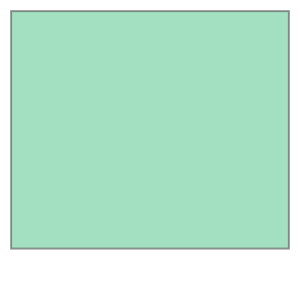

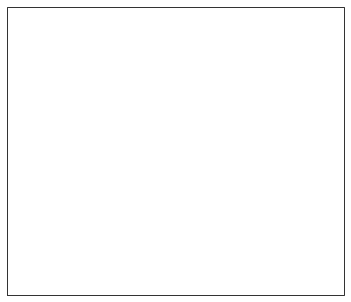

In [54]:
proj_ax = plt.figure().add_axes([0, 0, 1, 1], projection=crs.Mercator())
boundary = proj_ax._get_extent_geom()
boundary

In [17]:
norm(temp_slice)

nan